Task 1

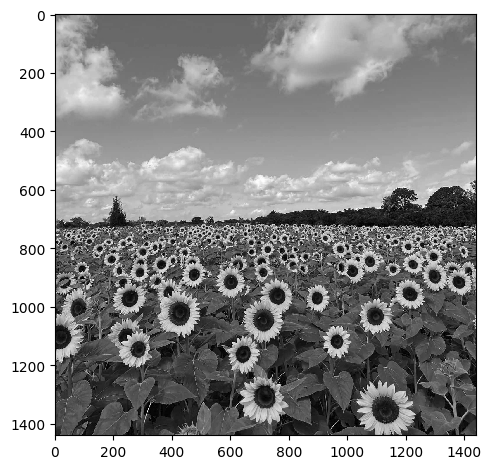

In [16]:
image = 'Img/the_berry_farms_sunflower_field.jpeg'

import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import numpy as np

im = rgb2gray(imread(image))
imshow(im)

In [14]:
im_bw = (im < 0.5) * 1
im_mask = im > 0.5
imshow(im_mask, cmap='gray')

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# Load the sunflower field image
im = cv.imread('Img/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Detect blobs using Laplacian of Gaussian (LoG) method
blobs = blob_log(gray, max_sigma=30, num_sigma=10, threshold=0.1)

# Calculate radii for each blob based on sigma
blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius

# Draw the detected circles on the image
for blob in blobs:
    y, x, r = blob
    cv.circle(im, (int(x), int(y)), int(r), (0, 255, 0), 2)

# Display the image with detected circles
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Find the largest circle
if len(blobs) > 0:
    largest_blob = max(blobs, key=lambda b: b[2])
    x_largest, y_largest, radius_largest = largest_blob
    print(f"Largest circle parameters: Center=({x_largest:.2f}, {y_largest:.2f}), Radius={radius_largest:.2f}")
else:
    print("No circles detected.")


Largest circle parameters: Center=(0.00, 234.00), Radius=42.43


In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_doh

# Load the sunflower field image
im = cv.imread('Img/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Detect blobs using Laplacian of Gaussian (LoG) method
blobs_log = blob_log(gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Convert sigma to radius

# Detect blobs using Determinant of Hessian (DoH) method
blobs_doh = blob_doh(gray, max_sigma=30, threshold=0.01)

# Draw the detected circles on the image for LoG
im_log = im.copy()
for blob in blobs_log:
    y, x, r = blob
    cv.circle(im_log, (int(x), int(y)), int(r), (255, 0, 0), 2)

# Draw the detected circles on the image for DoH
im_doh = im.copy()
for blob in blobs_doh:
    y, x, r = blob
    cv.circle(im_doh, (int(x), int(y)), int(r), (0, 255, 0), 2)

# Display the images with detected circles
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(im_log, cv.COLOR_BGR2RGB))
axes[0].set_title('LoG Detected Circles')
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(im_doh, cv.COLOR_BGR2RGB))
axes[1].set_title('DoH Detected Circles')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Find the largest circle for LoG
if len(blobs_log) > 0:
    largest_blob_log = max(blobs_log, key=lambda b: b[2])
    x_largest_log, y_largest_log, radius_largest_log = largest_blob_log
    print(f"Largest circle using LoG: Center=({x_largest_log:.2f}, {y_largest_log:.2f}), Radius={radius_largest_log:.2f}")
else:
    print("No circles detected using LoG.")

# Find the largest circle for DoH
if len(blobs_doh) > 0:
    largest_blob_doh = max(blobs_doh, key=lambda b: b[2])
    x_largest_doh, y_largest_doh, radius_largest_doh = largest_blob_doh
    print(f"Largest circle using DoH: Center=({x_largest_doh:.2f}, {y_largest_doh:.2f}), Radius={radius_largest_doh:.2f}")
else:
    print("No circles detected using DoH.")


Largest circle using LoG: Center=(0.00, 234.00), Radius=42.43
Largest circle using DoH: Center=(132.00, 344.00), Radius=30.00


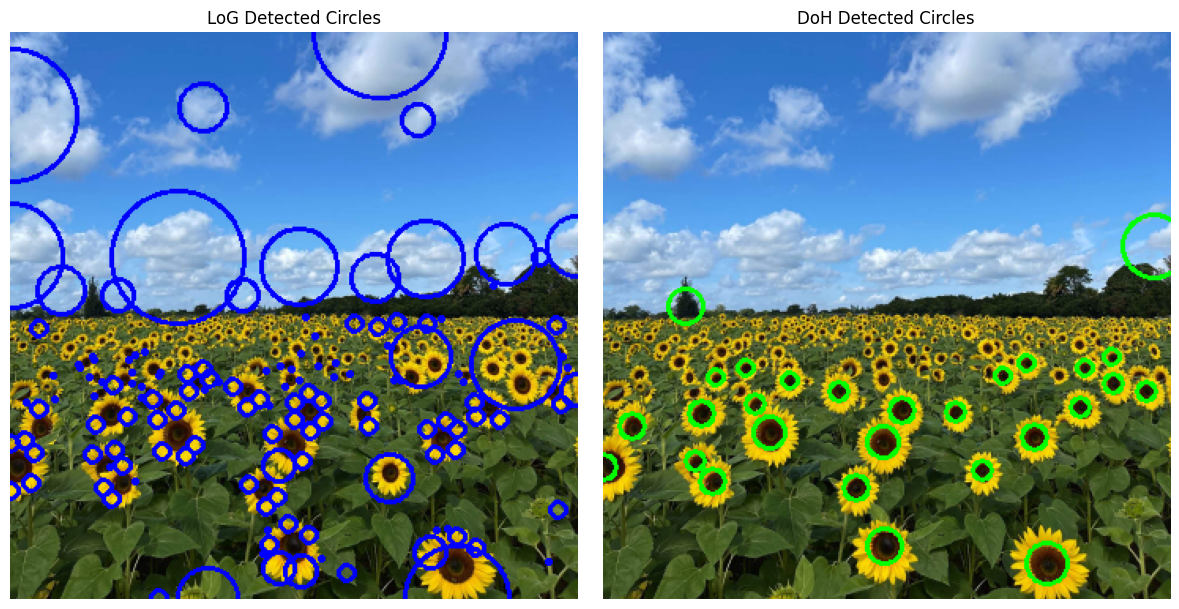

Largest circle using LoG: Center=(0.00, 234.00), Radius=42.43
Largest circle using DoH: Center=(136.00, 349.00), Radius=20.00


In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_doh

# Load the sunflower field image
im = cv.imread('Img/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
gray_blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Detect blobs using Laplacian of Gaussian (LoG) method
blobs_log = blob_log(gray_blurred, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Convert sigma to radius

# Detect blobs using Determinant of Hessian (DoH) method
#blobs_doh = blob_doh(gray_blurred, max_sigma=30, threshold=0.01)

blobs_doh = blob_doh(gray_blurred, min_sigma=5, max_sigma=20, num_sigma=10, threshold=0.01)

# Draw the detected circles on the image for LoG
im_log = im.copy()
for blob in blobs_log:
    y, x, r = blob
    cv.circle(im_log, (int(x), int(y)), int(r), (255, 0, 0), 2)

# Draw the detected circles on the image for DoH
im_doh = im.copy()
for blob in blobs_doh:
    y, x, r = blob
    cv.circle(im_doh, (int(x), int(y)), int(r), (0, 255, 0), 2)

# Display the images with detected circles
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(im_log, cv.COLOR_BGR2RGB))
axes[0].set_title('LoG Detected Circles')
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(im_doh, cv.COLOR_BGR2RGB))
axes[1].set_title('DoH Detected Circles')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Find the largest circle for LoG
if len(blobs_log) > 0:
    largest_blob_log = max(blobs_log, key=lambda b: b[2])
    x_largest_log, y_largest_log, radius_largest_log = largest_blob_log
    print(f"Largest circle using LoG: Center=({x_largest_log:.2f}, {y_largest_log:.2f}), Radius={radius_largest_log:.2f}")
else:
    print("No circles detected using LoG.")

# Find the largest circle for DoH
if len(blobs_doh) > 0:
    largest_blob_doh = max(blobs_doh, key=lambda b: b[2])
    x_largest_doh, y_largest_doh, radius_largest_doh = largest_blob_doh
    print(f"Largest circle using DoH: Center=({x_largest_doh:.2f}, {y_largest_doh:.2f}), Radius={radius_largest_doh:.2f}")
else:
    print("No circles detected using DoH.")


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the sunflower field image
im = cv.imread('Img/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_COLOR)

# Convert image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Laplacian of Gaussian filter using the provided formula
def laplace_of_gaussian(sigma):
    hw = round(3 * sigma)  # Half width of kernel
    X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
    
    log = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return log

# Detect maxima in the filtered image using the provided function
def detect_max(img_log, sigma):
    coordinates = []
    (h, w) = img_log.shape
    k = 1  # Window size to check neighborhood for maxima
    for i in range(k, h - k):
        for j in range(k, w - k):
            slice_img = img_log[i - k:i + k + 1, j - k:j + k + 1]
            result = np.max(slice_img)  # finding maximum
            if result >= 0.09:  # Threshold
                x, y = np.unravel_index(slice_img.argmax(), slice_img.shape)
                coordinates.append((i + x - k, j + y - k))  # finding coordinates
    return set(coordinates)

# Function to detect blobs using LoG and maxima detection
def detect_blobs_with_custom_log(sigma, radius_range):
    h, w = gray.shape
    blobs = []

    # Compute LoG filter
    log_filter = laplace_of_gaussian(sigma)

    # Apply LoG filter to the grayscale image
    img_log = convolve(gray.astype(np.float64), log_filter)

    # Detect maxima in the LoG filtered image
    maxima_coords = detect_max(img_log, sigma)

    # For each detected maximum, determine the radius and filter by range
    for y, x in maxima_coords:
        radius = np.sqrt(2) * sigma
        if radius_range[0] <= radius <= radius_range[1]:
            blobs.append((x, y, radius))
    
    return blobs

# Set the sigma and radius range
fixed_sigma = 2.5  # Fixed sigma for LoG
radius_range = (1, 10)

# Detect blobs
blobs = detect_blobs_with_custom_log(fixed_sigma, radius_range)

# Draw the detected circles on the image
for x, y, radius in blobs:
    cv.circle(im, (x, y), int(radius), (0, 255, 0), 2)

# Display the image with detected circles
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Report the largest circle (blob) parameters
if blobs:
    largest_blob = max(blobs, key=lambda b: b[2])
    x_largest, y_largest, radius_largest = largest_blob
    print(f"Largest circle parameters: Center=({x_largest}, {y_largest}), Radius={radius_largest:.2f}")
else:
    print("No circles detected.")


Largest circle parameters: Center=(1228, 1374), Radius=3.54


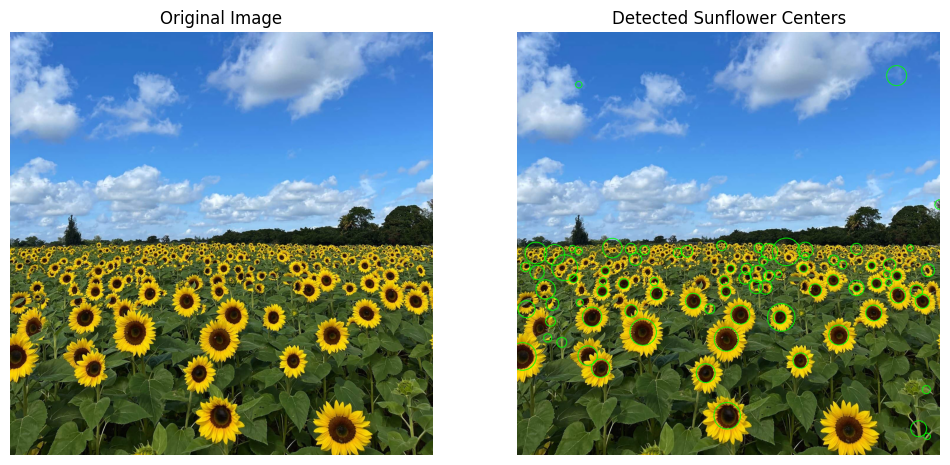

Detected circles (x, y, radius):
Center: (18, 1104), Radius: 47
Center: (1379, 916), Radius: 24
Center: (1296, 896), Radius: 26
Center: (1359, 882), Radius: 21
Center: (1265, 853), Radius: 11
Center: (1224, 855), Radius: 17
Center: (1293, 830), Radius: 15
Center: (1259, 824), Radius: 12
Center: (1207, 795), Radius: 12
Center: (1268, 793), Radius: 21
Center: (1396, 1376), Radius: 11
Center: (1367, 1350), Radius: 27
Center: (715, 1306), Radius: 45
Center: (1393, 1217), Radius: 14
Center: (642, 1161), Radius: 32
Center: (965, 1118), Radius: 26
Center: (284, 1144), Radius: 31
Center: (240, 1101), Radius: 33
Center: (152, 1056), Radius: 17
Center: (104, 1041), Radius: 14
Center: (1095, 1031), Radius: 34
Center: (114, 984), Radius: 17
Center: (32, 943), Radius: 29
Center: (656, 942), Radius: 17
Center: (899, 971), Radius: 47
Center: (894, 971), Radius: 22
Center: (213, 921), Radius: 12
Center: (1214, 956), Radius: 27
Center: (120, 925), Radius: 22
Center: (712, 1045), Radius: 41
Center: (760

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'Img/the_berry_farms_sunflower_field.jpeg'  # Update path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image is loaded
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur to reduce noise and improve blob detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Step 2: Enhance contrast with Histogram Equalization
    equalized = cv2.equalizeHist(blurred)

    # Step 3: Apply Otsu's thresholding to create a binary mask
    _, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 4: Find contours (potential circles)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Draw detected contours
    output_image = image.copy()
    largest_circles = []

    for contour in contours:
        # Fit a minimum enclosing circle to each contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Filter based on size to ignore small or excessively large areas
        if 10 < radius < 50:  # Adjust this range based on your image's sunflower size
            # Store the largest circles
            largest_circles.append((center, radius))
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)

    # Step 6: Display the results
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output_image_rgb)
    plt.title('Detected Sunflower Centers')
    plt.axis('off')

    plt.show()

    # Report parameters of the largest circles
    print("Detected circles (x, y, radius):")
    for circle in largest_circles:
        center, radius = circle
        print(f"Center: {center}, Radius: {radius}")


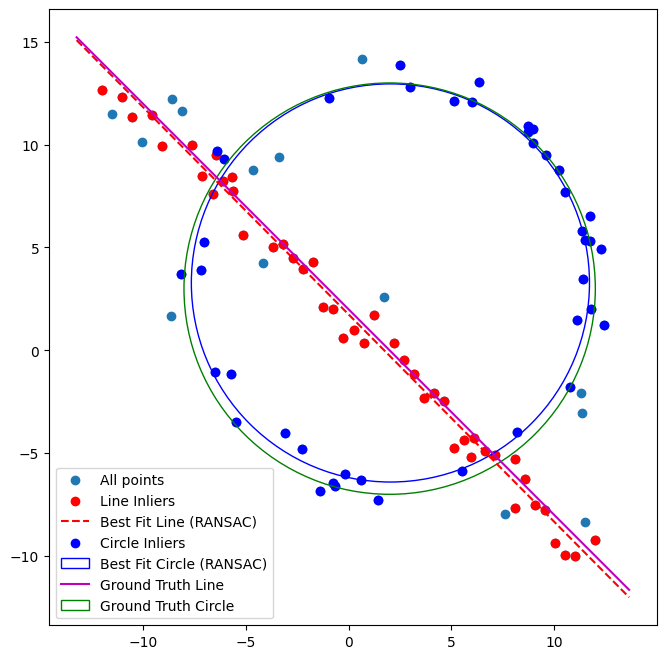

Best Fit Line: Normal=[-0.71003654 -0.70416484], Point on Line=[ 6.6122449  -4.91742667]
Best Fit Circle: Center=[2.0370331  3.27607264], Radius=9.679013715560805


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy points for a line and a circle (as provided)
N = 100
half_n = N // 2

# Circle parameters (Ground truth)
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Line parameters (Ground truth)
s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points
X = np.vstack((X_circ, X_line))

# Function to fit a line using RANSAC
def fit_line_ransac(X, threshold=1.0, iterations=100):
    best_inliers = []
    best_line = None
    for i in range(iterations):
        # Randomly select 2 points
        idx = np.random.choice(len(X), 2, replace=False)
        p1, p2 = X[idx]

        # Calculate the normal vector (a, b) to the line
        a, b = p2 - p1
        normal = np.array([-b, a]) / np.linalg.norm([a, b])

        # Calculate distance of all points to the line
        distances = np.abs((X - p1) @ normal)

        # Select inliers
        inliers = X[distances < threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_line = normal, p1

    return best_line, best_inliers

# Function to fit a circle using RANSAC
def fit_circle_ransac(X, threshold=1.0, iterations=100):
    best_inliers = []
    best_circle = None
    for i in range(iterations):
        # Randomly select 3 points
        idx = np.random.choice(len(X), 3, replace=False)
        p1, p2, p3 = X[idx]

        # Calculate the circle center and radius from the 3 points
        A = 2 * (p2 - p1)
        B = 2 * (p3 - p1)
        C = np.dot(p2, p2) - np.dot(p1, p1)
        D = np.dot(p3, p3) - np.dot(p1, p1)
        center = np.linalg.solve(np.array([A, B]), np.array([C, D]))
        radius = np.linalg.norm(center - p1)

        # Calculate distances from all points to the circle
        distances = np.abs(np.linalg.norm(X - center, axis=1) - radius)

        # Select inliers
        inliers = X[distances < threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_circle = center, radius

    return best_circle, best_inliers

# Fit the line using RANSAC
best_line, line_inliers = fit_line_ransac(X)

# Remove line inliers and fit a circle using RANSAC
remaining_points = np.array([p for p in X if p not in line_inliers])
best_circle, circle_inliers = fit_circle_ransac(remaining_points)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all points
ax.scatter(X[:, 0], X[:, 1], label='All points')

# Plot line inliers
ax.scatter(line_inliers[:, 0], line_inliers[:, 1], color='r', label='Line Inliers')

# Plot the best fit line
x_vals = np.array(ax.get_xlim())
y_vals = -(best_line[0][0] / best_line[0][1]) * (x_vals - best_line[1][0]) + best_line[1][1]
ax.plot(x_vals, y_vals, 'r--', label='Best Fit Line (RANSAC)')

# Plot circle inliers
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], color='b', label='Circle Inliers')

# Plot the best fit circle
circle = plt.Circle(best_circle[0], best_circle[1], color='b', fill=False, label='Best Fit Circle (RANSAC)')
ax.add_patch(circle)

# Plot the ground truth line
y_gt_vals = m * x_vals + b
ax.plot(x_vals, y_gt_vals, 'm-', label='Ground Truth Line')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)

# Set aspect ratio and display the legend
ax.set_aspect('equal')
ax.legend()
plt.show()

# Print results
print(f"Best Fit Line: Normal={best_line[0]}, Point on Line={best_line[1]}")
print(f"Best Fit Circle: Center={best_circle[0]}, Radius={best_circle[1]}")


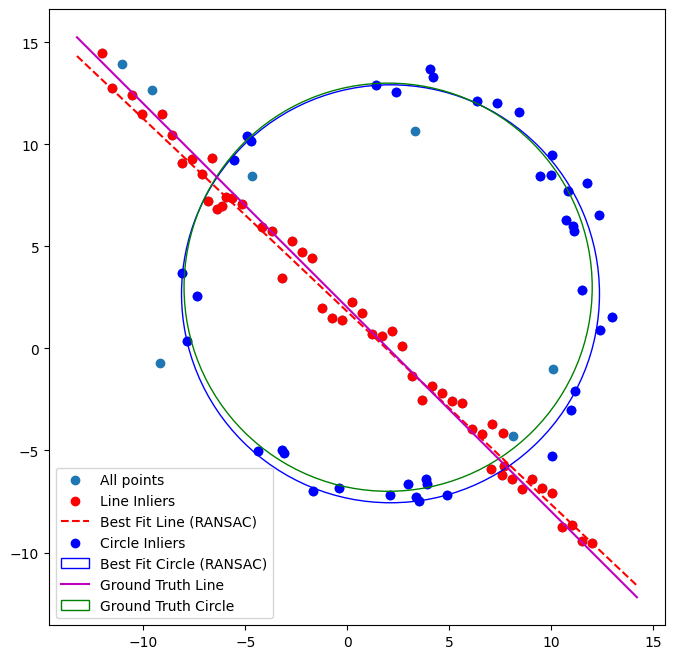

Best Fit Line: Normal=[0.68704765 0.72661236], Point on Line=[-5.95598569  7.43383278]
Best Fit Circle: Center=[2.11649458 2.6778256 ], Radius=10.240007850597696


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate noisy points for a line and a circle (as provided)
N = 100
half_n = N // 2

# Circle parameters (Ground truth)
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Line parameters (Ground truth)
s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points
X = np.vstack((X_circ, X_line))

# Function to fit a line using RANSAC
def fit_line_ransac(X, threshold=1.0, iterations=100):
    best_inliers = []
    best_line = None
    for _ in range(iterations):
        # Randomly select 2 points
        idx = np.random.choice(len(X), 2, replace=False)
        p1, p2 = X[idx]

        # Calculate the normal vector (a, b) to the line
        a, b = p2 - p1
        normal = np.array([-b, a]) / np.linalg.norm([a, b])

        # Calculate distance of all points to the line
        distances = np.abs((X - p1) @ normal)

        # Select inliers
        inliers = X[distances < threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_line = normal, p1

    return best_line, best_inliers

# Function to fit a circle using RANSAC
def fit_circle_ransac(X, threshold=1.0, iterations=100):
    best_inliers = []
    best_circle = None
    for _ in range(iterations):
        # Randomly select 3 points
        idx = np.random.choice(len(X), 3, replace=False)
        p1, p2, p3 = X[idx]

        # Calculate the circle center and radius from the 3 points
        A = 2 * (p2 - p1)
        B = 2 * (p3 - p1)
        C = np.dot(p2, p2) - np.dot(p1, p1)
        D = np.dot(p3, p3) - np.dot(p1, p1)
        center = np.linalg.solve(np.array([A, B]), np.array([C, D]))
        radius = np.linalg.norm(center - p1)

        # Calculate distances from all points to the circle
        distances = np.abs(np.linalg.norm(X - center, axis=1) - radius)

        # Select inliers
        inliers = X[distances < threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_circle = center, radius

    return best_circle, best_inliers

# Fit the line using RANSAC
best_line, line_inliers = fit_line_ransac(X)

# Remove line inliers and fit a circle using RANSAC
remaining_points = np.array([p for p in X if p not in line_inliers])
best_circle, circle_inliers = fit_circle_ransac(remaining_points)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all points
ax.scatter(X[:, 0], X[:, 1], label='All points')

# Plot line inliers
ax.scatter(line_inliers[:, 0], line_inliers[:, 1], color='r', label='Line Inliers')

# Plot the best fit line
x_vals = np.array(ax.get_xlim())
y_vals = -(best_line[0][0] / best_line[0][1]) * (x_vals - best_line[1][0]) + best_line[1][1]
ax.plot(x_vals, y_vals, 'r--', label='Best Fit Line (RANSAC)')

# Plot circle inliers
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], color='b', label='Circle Inliers')

# Plot the best fit circle
circle = plt.Circle(best_circle[0], best_circle[1], color='b', fill=False, label='Best Fit Circle (RANSAC)')
ax.add_patch(circle)

# Plot the ground truth line
y_gt_vals = m * x_vals + b
ax.plot(x_vals, y_gt_vals, 'm-', label='Ground Truth Line')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)

# Set aspect ratio and display the legend
ax.set_aspect('equal')
ax.legend()
plt.show()

# Print results
print(f"Best Fit Line: Normal={best_line[0]}, Point on Line={best_line[1]}")
print(f"Best Fit Circle: Center={best_circle[0]}, Radius={best_circle[1]}")



In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
architectural_img = cv.imread(r'Img\005.jpg')  # Replace with your architectural image path
flag_img = cv.imread(r'Img\flag.png')  # Replace with the flag image path

if architectural_img is None or flag_img is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Initialize list to store points clicked by the user
points_architectural = []

# Mouse click event callback function
def select_points(event, x, y, flags, param):
    global points_architectural
    if event == cv.EVENT_LBUTTONDOWN:
        points_architectural.append([x, y])
        cv.circle(architectural_img_display, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Select 4 Points", architectural_img_display)

# Create a copy for display purposes
architectural_img_display = architectural_img.copy()

# Set up window and mouse callback
cv.namedWindow("Select 4 Points", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback("Select 4 Points", select_points)

# Display the image until 4 points are selected
print("Click on four points on the architectural image to select the region for the flag.")
while len(points_architectural) < 4:
    cv.imshow("Select 4 Points", architectural_img_display)
    if cv.waitKey(10) & 0xFF == 27:  # Press 'Esc' key to exit if needed
        print("User canceled point selection.")
        cv.destroyAllWindows()
        exit()

cv.destroyAllWindows()

# Convert points to NumPy array of type float32
points_architectural = np.array(points_architectural, dtype='float32')

# Get the dimensions of the flag image
height, width, _ = flag_img.shape

# Define the four corners of the flag image
points_flag = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_flag, points_architectural)

# Warp the flag image to fit the selected region in the architectural image
warped_flag = cv.warpPerspective(flag_img, homography_matrix, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask from the warped flag image
mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(mask, points_architectural.astype(int), (255, 255, 255))

# Blend the warped flag image with reduced opacity to make it look more natural
alpha = 0.6  # Opacity level for blending
blended_warped_flag = cv.addWeighted(warped_flag, alpha, architectural_img, 1 - alpha, 0)

# Combine the blended flag with the architectural image
blended_img = cv.bitwise_and(architectural_img, cv.bitwise_not(mask)) + cv.bitwise_and(blended_warped_flag, mask)

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Architectural Image with Superimposed Flag')
plt.show()

Click on four points on the architectural image to select the region for the flag.


Click on four points on the architectural image to select the region for the flag.


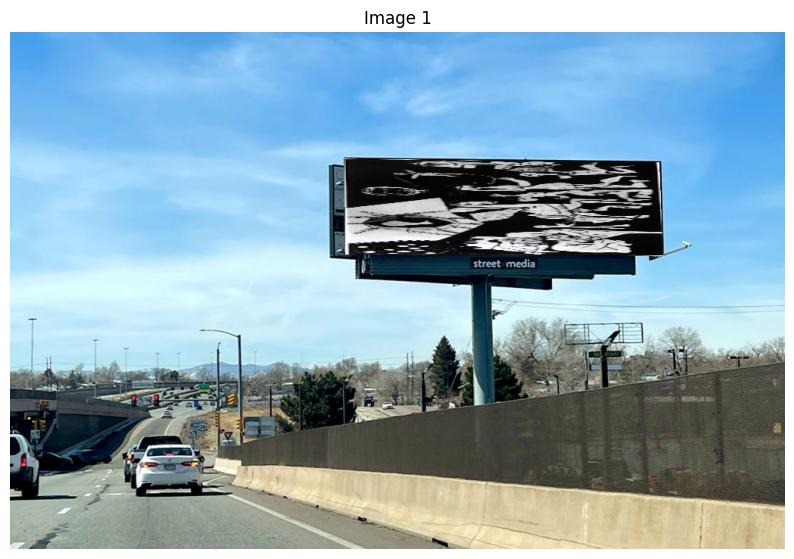

In [51]:
# Load the architectural image and the flag image
architectural_img = cv.imread(r'Img\build1.jpg')  # Replace with your architectural image path
flag_img = cv.imread(r'Img\build1stch.jpg')  # Replace with the flag image path

if architectural_img is None or flag_img is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Initialize list to store points clicked by the user
points_architectural = []

# Mouse click event callback function
def select_points(event, x, y, flags, param):
    global points_architectural
    if event == cv.EVENT_LBUTTONDOWN:
        points_architectural.append([x, y])
        cv.circle(architectural_img_display, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Select 4 Points", architectural_img_display)

# Create a copy for display purposes
architectural_img_display = architectural_img.copy()

# Set up window and mouse callback
cv.namedWindow("Select 4 Points", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback("Select 4 Points", select_points)

# Display the image until 4 points are selected
print("Click on four points on the architectural image to select the region for the flag.")
while len(points_architectural) < 4:
    cv.imshow("Select 4 Points", architectural_img_display)
    if cv.waitKey(10) & 0xFF == 27:  # Press 'Esc' key to exit if needed
        print("User canceled point selection.")
        cv.destroyAllWindows()
        exit()

cv.destroyAllWindows()

# Convert points to NumPy array of type float32
points_architectural = np.array(points_architectural, dtype='float32')

# Get the dimensions of the flag image
height, width, _ = flag_img.shape

# Define the four corners of the flag image
points_flag = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_flag, points_architectural)

# Warp the flag image to fit the selected region in the architectural image
warped_flag = cv.warpPerspective(flag_img, homography_matrix, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask from the warped flag image
mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(mask, points_architectural.astype(int), (255, 255, 255))

# Blend the warped flag image with reduced opacity to make it look more natural
alpha = 1  # Opacity level for blending
blended_warped_flag = cv.addWeighted(warped_flag, alpha, architectural_img, 1 - alpha, 0)

# Combine the blended flag with the architectural image
blended_img = cv.bitwise_and(architectural_img, cv.bitwise_not(mask)) + cv.bitwise_and(blended_warped_flag, mask)

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image 1')
plt.show()

Click on four points on the architectural image to select the region for the flag.


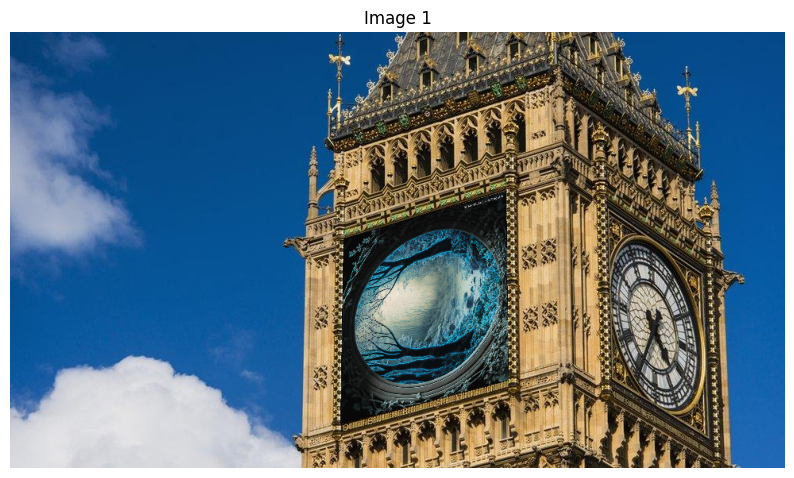

In [53]:
# Load the architectural image and the flag image
architectural_img = cv.imread(r'Img\buld2.jpg')  # Replace with your architectural image path
flag_img = cv.imread(r'Img\buld2stich.jpg')  # Replace with the flag image path

if architectural_img is None or flag_img is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Initialize list to store points clicked by the user
points_architectural = []

# Mouse click event callback function
def select_points(event, x, y, flags, param):
    global points_architectural
    if event == cv.EVENT_LBUTTONDOWN:
        points_architectural.append([x, y])
        cv.circle(architectural_img_display, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Select 4 Points", architectural_img_display)

# Create a copy for display purposes
architectural_img_display = architectural_img.copy()

# Set up window and mouse callback
cv.namedWindow("Select 4 Points", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback("Select 4 Points", select_points)

# Display the image until 4 points are selected
print("Click on four points on the architectural image to select the region for the flag.")
while len(points_architectural) < 4:
    cv.imshow("Select 4 Points", architectural_img_display)
    if cv.waitKey(10) & 0xFF == 27:  # Press 'Esc' key to exit if needed
        print("User canceled point selection.")
        cv.destroyAllWindows()
        exit()

cv.destroyAllWindows()

# Convert points to NumPy array of type float32
points_architectural = np.array(points_architectural, dtype='float32')

# Get the dimensions of the flag image
height, width, _ = flag_img.shape

# Define the four corners of the flag image
points_flag = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_flag, points_architectural)

# Warp the flag image to fit the selected region in the architectural image
warped_flag = cv.warpPerspective(flag_img, homography_matrix, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask from the warped flag image
mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(mask, points_architectural.astype(int), (255, 255, 255))

# Blend the warped flag image with reduced opacity to make it look more natural
alpha = 1  # Opacity level for blending
blended_warped_flag = cv.addWeighted(warped_flag, alpha, architectural_img, 1 - alpha, 0)

# Combine the blended flag with the architectural image
blended_img = cv.bitwise_and(architectural_img, cv.bitwise_not(mask)) + cv.bitwise_and(blended_warped_flag, mask)

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image 1')
plt.show()

In [55]:
# Load the architectural image and the flag image
architectural_img = cv.imread(r'Img\buld3.png')  # Replace with your architectural image path
flag_img = cv.imread(r'Img\buld3stch.jpg')  # Replace with the flag image path

if architectural_img is None or flag_img is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Initialize list to store points clicked by the user
points_architectural = []

# Mouse click event callback function
def select_points(event, x, y, flags, param):
    global points_architectural
    if event == cv.EVENT_LBUTTONDOWN:
        points_architectural.append([x, y])
        cv.circle(architectural_img_display, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Select 4 Points", architectural_img_display)

# Create a copy for display purposes
architectural_img_display = architectural_img.copy()

# Set up window and mouse callback
cv.namedWindow("Select 4 Points", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback("Select 4 Points", select_points)

# Display the image until 4 points are selected
print("Click on four points on the architectural image to select the region for the flag.")
while len(points_architectural) < 4:
    cv.imshow("Select 4 Points", architectural_img_display)
    if cv.waitKey(10) & 0xFF == 27:  # Press 'Esc' key to exit if needed
        print("User canceled point selection.")
        cv.destroyAllWindows()
        exit()

cv.destroyAllWindows()

# Convert points to NumPy array of type float32
points_architectural = np.array(points_architectural, dtype='float32')

# Get the dimensions of the flag image
height, width, _ = flag_img.shape

# Define the four corners of the flag image
points_flag = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_flag, points_architectural)

# Warp the flag image to fit the selected region in the architectural image
warped_flag = cv.warpPerspective(flag_img, homography_matrix, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask from the warped flag image
mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(mask, points_architectural.astype(int), (255, 255, 255))

# Blend the warped flag image with reduced opacity to make it look more natural
alpha = 1  # Opacity level for blending
blended_warped_flag = cv.addWeighted(warped_flag, alpha, architectural_img, 1 - alpha, 0)

# Combine the blended flag with the architectural image
blended_img = cv.bitwise_and(architectural_img, cv.bitwise_not(mask)) + cv.bitwise_and(blended_warped_flag, mask)

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image 1')
plt.show()

Click on four points on the architectural image to select the region for the flag.
User canceled point selection.
User canceled point selection.
User canceled point selection.
User canceled point selection.
User canceled point selection.
User canceled point selection.
User canceled point selection.
User canceled point selection.


KeyboardInterrupt: 

: 

Click on four points on the architectural image to select the region for the flag.


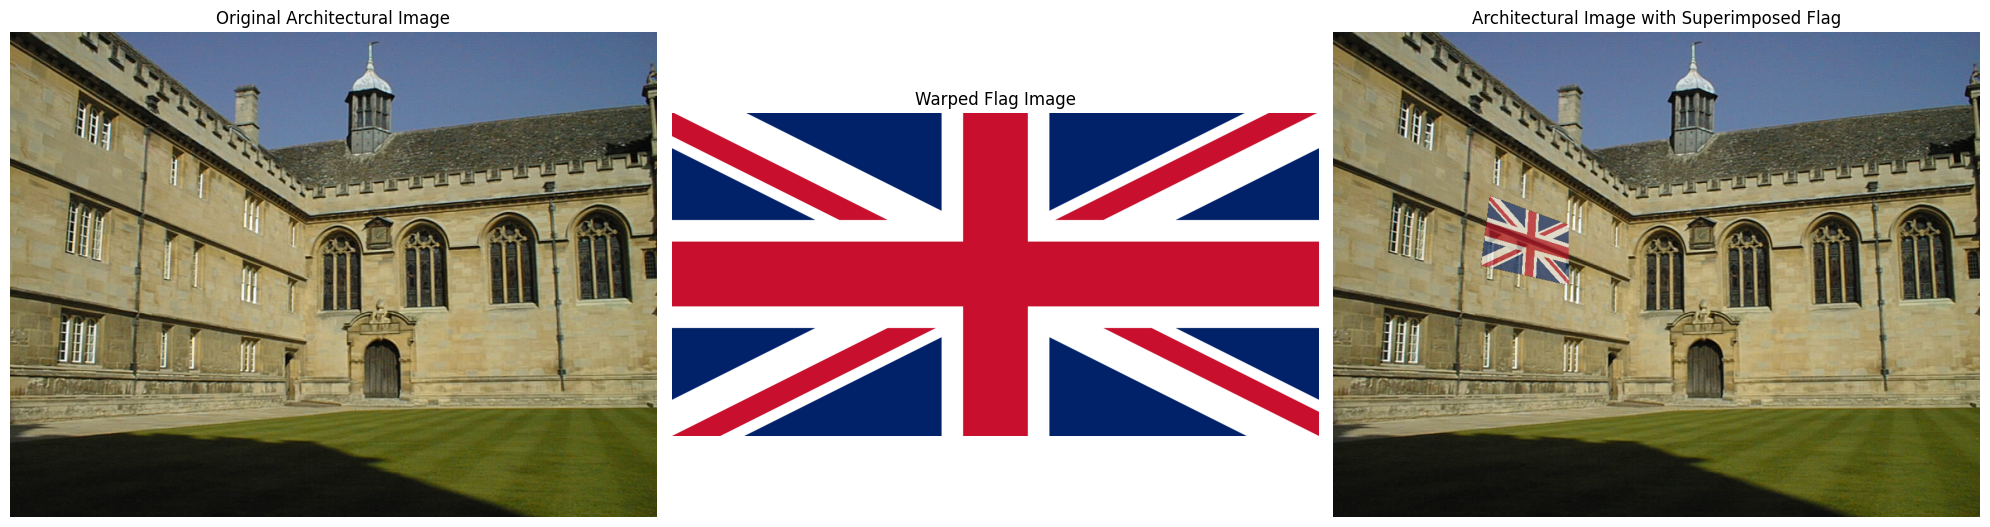

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
architectural_img = cv.imread(r'Img\005.jpg')  # Replace with your architectural image path
flag_img = cv.imread(r'Img\flag.png')  # Replace with the flag image path

if architectural_img is None or flag_img is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Initialize list to store points clicked by the user
points_architectural = []

# Mouse click event callback function
def select_points(event, x, y, flags, param):
    global points_architectural
    if event == cv.EVENT_LBUTTONDOWN:
        points_architectural.append([x, y])
        cv.circle(architectural_img_display, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Select 4 Points", architectural_img_display)

# Create a copy for display purposes
architectural_img_display = architectural_img.copy()

# Set up window and mouse callback
cv.namedWindow("Select 4 Points", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback("Select 4 Points", select_points)

# Display the image until 4 points are selected
print("Click on four points on the architectural image to select the region for the flag.")
while len(points_architectural) < 4:
    cv.imshow("Select 4 Points", architectural_img_display)
    if cv.waitKey(10) & 0xFF == 27:  # Press 'Esc' key to exit if needed
        print("User canceled point selection.")
        cv.destroyAllWindows()
        exit()

cv.destroyAllWindows()

# Convert points to NumPy array of type float32
points_architectural = np.array(points_architectural, dtype='float32')

# Get the dimensions of the flag image
height, width, _ = flag_img.shape

# Define the four corners of the flag image
points_flag = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_flag, points_architectural)

# Warp the flag image to fit the selected region in the architectural image
warped_flag = cv.warpPerspective(flag_img, homography_matrix, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask from the warped flag image
mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(mask, points_architectural.astype(int), (255, 255, 255))

# Blend the warped flag image with reduced opacity to make it look more natural
alpha = 0.6  # Opacity level for blending
blended_warped_flag = cv.addWeighted(warped_flag, alpha, architectural_img, 1 - alpha, 0)

# Combine the blended flag with the architectural image
blended_img = cv.bitwise_and(architectural_img, cv.bitwise_not(mask)) + cv.bitwise_and(blended_warped_flag, mask)

# Display the original, warped, and blended images side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Original architectural image
axes[0].imshow(cv.cvtColor(architectural_img, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Architectural Image')
axes[0].axis('off')

# Warped flag image
axes[1].imshow(cv.cvtColor(flag_img, cv.COLOR_BGR2RGB))
axes[1].set_title('Warped Flag Image')
axes[1].axis('off')

# Blended result
axes[2].imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
axes[2].set_title('Architectural Image with Superimposed Flag')
axes[2].axis('off')

plt.tight_layout()
plt.show()


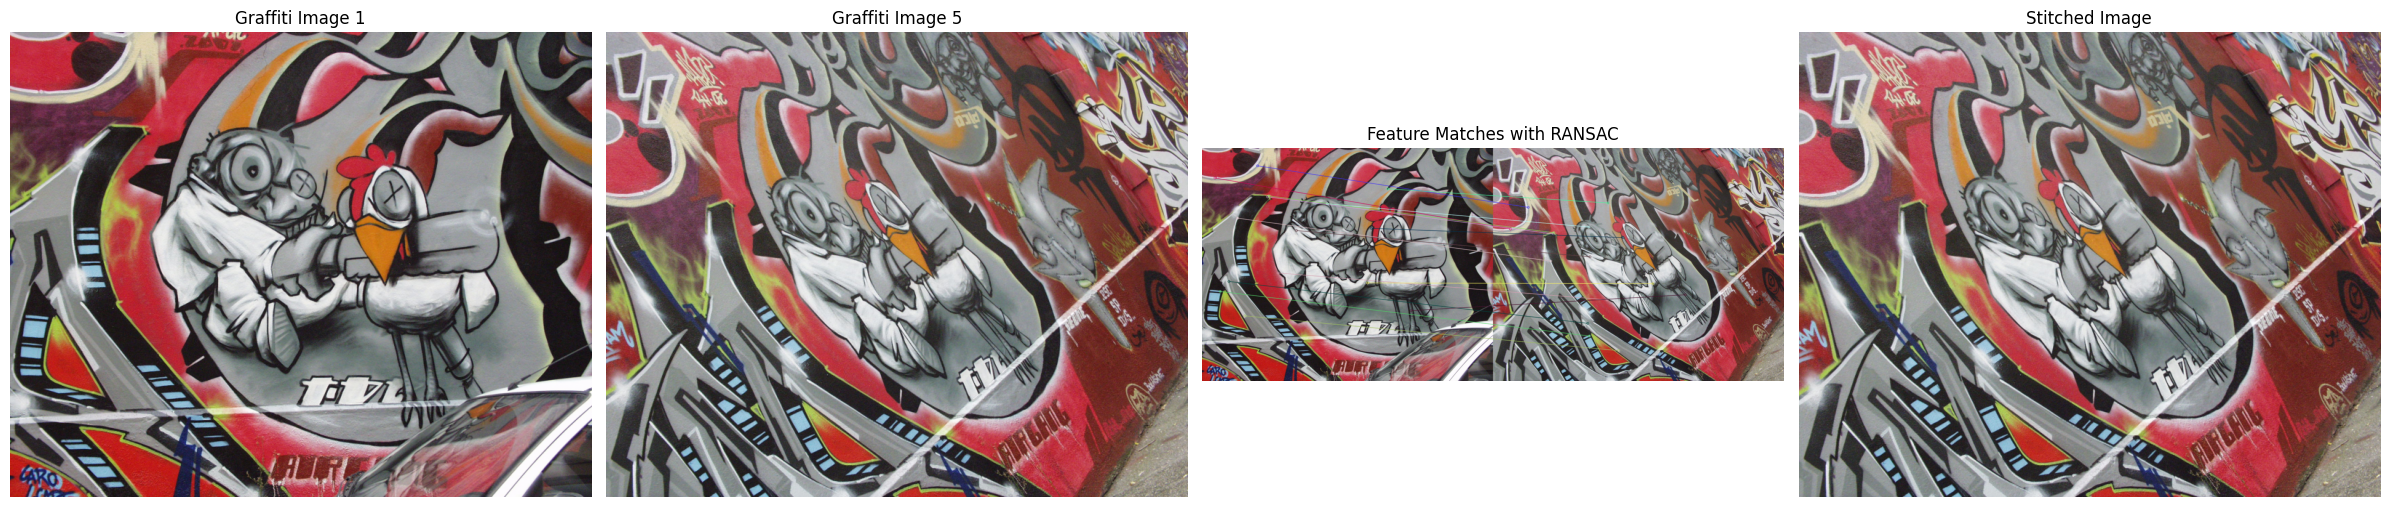

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img1 = cv.imread(r'Img\graf\graf\img1.ppm')  # Replace with the first graffiti image path
img5 = cv.imread(r'Img\graf\graf\img4.ppm')  # Replace with the second graffiti image path

if img1 is None or img5 is None:
    print("Error: Could not load images. Please check the file paths.")
    exit()

# Part (a) - Compute and match SIFT features between the two images
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints5, descriptors5 = sift.detectAndCompute(img5, None)

# Match features using FLANN-based matcher
flann_index_kdtree = 1
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors5, k=2)

# Apply Lowe's ratio test to filter good matches (more restrictive ratio)
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:  # More restrictive than 0.7
        good_matches.append(m)

# Draw the matches
img_matches = cv.drawMatches(img1, keypoints1, img5, keypoints5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Part (b) - Compute the homography using RANSAC
if len(good_matches) > 4:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute homography with higher RANSAC threshold to improve quality
    homography_matrix, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 3.0, confidence=0.995)
    matches_mask = mask.ravel().tolist()

    # Draw inliers
    img_ransac_matches = cv.drawMatches(img1, keypoints1, img5, keypoints5, good_matches, None, 
                                        matchesMask=matches_mask, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    print("Not enough matches found to compute homography.")
    exit()

# Part (c) - Stitch img1 onto img5
if homography_matrix is not None:
    height, width, _ = img5.shape
    stitched_img = cv.warpPerspective(img1, homography_matrix, (width, height))

    # Create masks for blending
    mask_stitched = (stitched_img > 0).astype(np.uint8)
    img5_masked = cv.bitwise_and(img5, img5, mask=cv.bitwise_not(mask_stitched[:, :, 0]))

    # Feather blending to reduce visible seams
    overlap_region = (mask_stitched[:, :, 0] & (img5[:, :, 0] > 0)).astype(np.float32)
    alpha = cv.GaussianBlur(overlap_region, (21, 21), 0) / 255.0

    # Weighted blend in overlapping areas
    blended_img = np.uint8(stitched_img * alpha[:, :, None] + img5_masked * (1 - alpha[:, :, None]))

else:
    print("Homography could not be computed.")
    exit()

# Display the images side by side
fig, axes = plt.subplots(1, 4, figsize=(24, 12))

# Original images
axes[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axes[0].set_title('Graffiti Image 1')
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
axes[1].set_title('Graffiti Image 5')
axes[1].axis('off')

# Matches
axes[2].imshow(cv.cvtColor(img_ransac_matches, cv.COLOR_BGR2RGB))
axes[2].set_title('Feature Matches with RANSAC')
axes[2].axis('off')

# Blended/Stitched Image
axes[3].imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB))
axes[3].set_title('Stitched Image')
axes[3].axis('off')

plt.tight_layout()
plt.show()
